<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/online_course_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded ✅
Shape: (15000, 5)
   videos_watched  assignments_submitted  days_since_last_login  forum_posts  \
0              11                      3                     27            4   
1              14                      4                     21            0   
2               8                      8                     22            2   
3              13                      2                     22            4   
4              16                      3                     36            1   

   dropout  
0        0  
1        1  
2        1  
3        0  
4        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   videos_watched         15000 non-null  int64
 1   assignments_submitted  15000 non-null  int64
 2   days_since_last_login  15000 non-null  int64
 3   forum_posts            15000

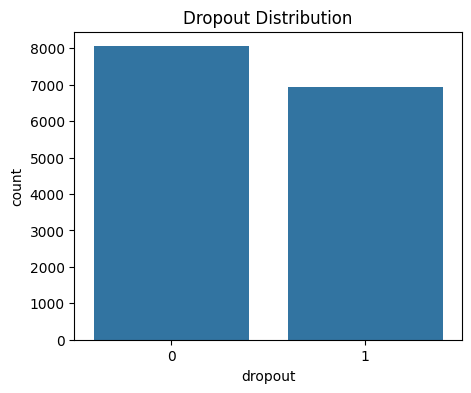

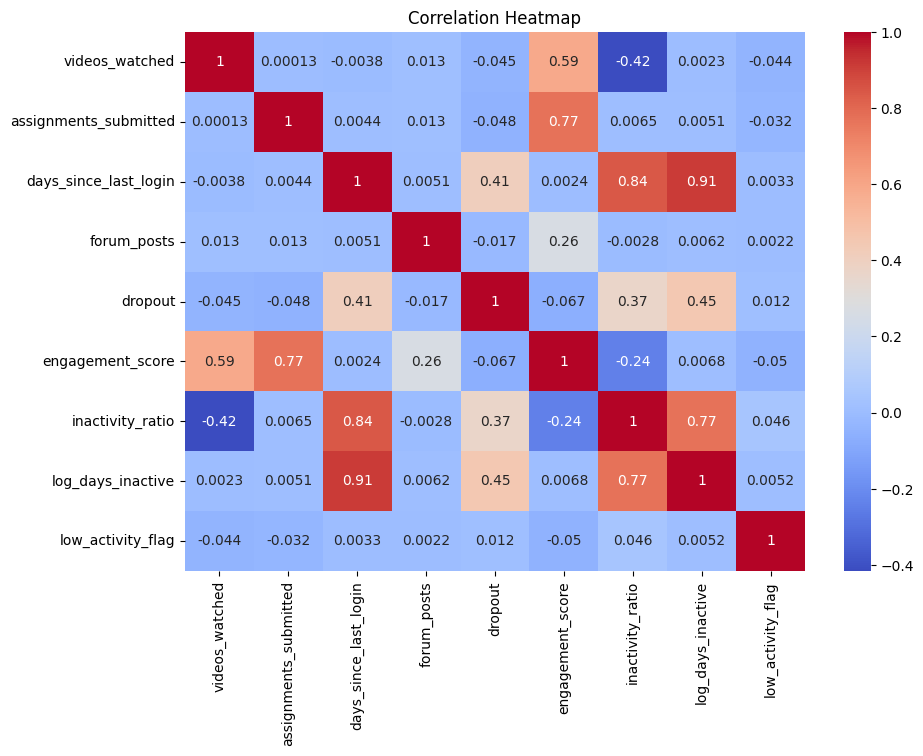


Train Shape: (12000, 8)
Test Shape: (3000, 8)

Logistic Regression
----------------------------------------
Accuracy: 0.6983333333333334
Confusion Matrix:
 [[ 913  698]
 [ 207 1182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.57      0.67      1611
           1       0.63      0.85      0.72      1389

    accuracy                           0.70      3000
   macro avg       0.72      0.71      0.70      3000
weighted avg       0.73      0.70      0.69      3000


Decision Tree
----------------------------------------
Accuracy: 0.6616666666666666
Confusion Matrix:
 [[1167  444]
 [ 571  818]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.70      1611
           1       0.65      0.59      0.62      1389

    accuracy                           0.66      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.66      0.66     

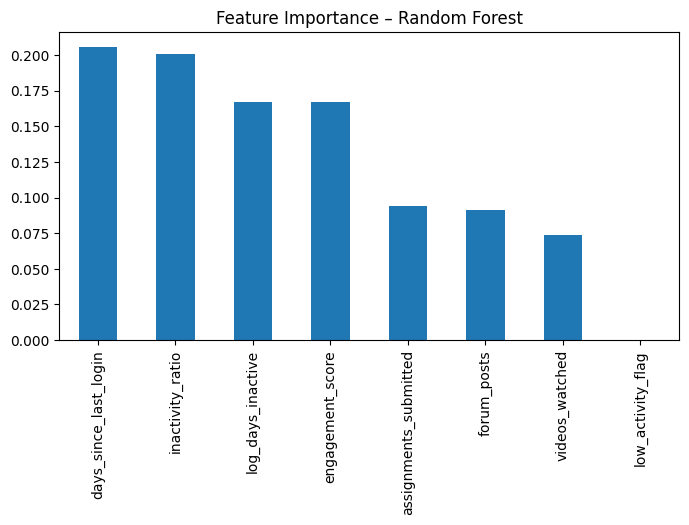


✅ Final Model Selected: Random Forest Classifier

Prediction for New Student:
⚠️ Student is likely to DROP OUT

🎉 PROJECT COMPLETED WITH FEATURE ENGINEERING!

• Problem Type      : Classification
• Feature Engineering : ✔ Applied
• Best Model        : Random Forest
• Metrics Used      : Accuracy, Precision, Recall, F1-score
• Business Impact   : Early detection of at-risk students



In [1]:
# ============================================================
# 🎓 STUDENT DROPOUT PREDICTION – COMPLETE ML PROJECT
# (Single File | With Feature Engineering)
# ============================================================

# =========================
# 1️⃣ IMPORT LIBRARIES
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =========================
# 2️⃣ LOAD DATASET
# =========================
df = pd.read_csv('/content/online_course_dropout.csv')

print("Dataset Loaded ✅")
print("Shape:", df.shape)
print(df.head())

# =========================
# 3️⃣ DATA UNDERSTANDING
# =========================
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())

# =========================
# 4️⃣ MISSING VALUE CHECK
# =========================
print("\nMissing Values:")
print(df.isnull().sum())

# =========================
# 5️⃣ FEATURE ENGINEERING
# =========================

# 🔹 1. Engagement Score (overall student activity)
df['engagement_score'] = (
    df['videos_watched'] +
    df['assignments_submitted'] * 2 +
    df['forum_posts']
)

# 🔹 2. Inactivity Ratio
df['inactivity_ratio'] = df['days_since_last_login'] / (df['videos_watched'] + 1)

# 🔹 3. Log transform for skewed feature
df['log_days_inactive'] = np.log1p(df['days_since_last_login'])

# 🔹 4. Low Activity Flag
df['low_activity_flag'] = (
    (df['videos_watched'] < 5) &
    (df['assignments_submitted'] < 2)
).astype(int)

print("\nFeature Engineering Applied ✅")
print(df.head())

# =========================
# 6️⃣ EXPLORATORY DATA ANALYSIS
# =========================

# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='dropout', data=df)
plt.title("Dropout Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# =========================
# 7️⃣ FEATURE & TARGET
# =========================
X = df.drop('dropout', axis=1)
y = df['dropout']

# =========================
# 8️⃣ TRAIN TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

# =========================
# 9️⃣ FEATURE SCALING
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# 🔟 MODEL TRAINING
# =========================

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# =========================
# 1️⃣1️⃣ MODEL EVALUATION
# =========================
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("-" * 40)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)

# =========================
# 1️⃣2️⃣ FEATURE IMPORTANCE
# =========================
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,4))
feature_importance.plot(kind='bar')
plt.title("Feature Importance – Random Forest")
plt.show()

# =========================
# 1️⃣3️⃣ FINAL MODEL
# =========================
print("\n✅ Final Model Selected: Random Forest Classifier")

# =========================
# 1️⃣4️⃣ NEW DATA PREDICTION
# =========================
new_student = pd.DataFrame({
    'videos_watched': [4],
    'assignments_submitted': [1],
    'days_since_last_login': [25],
    'forum_posts': [0]
})

# Apply SAME feature engineering
new_student['engagement_score'] = (
    new_student['videos_watched'] +
    new_student['assignments_submitted'] * 2 +
    new_student['forum_posts']
)
new_student['inactivity_ratio'] = (
    new_student['days_since_last_login'] /
    (new_student['videos_watched'] + 1)
)
new_student['log_days_inactive'] = np.log1p(
    new_student['days_since_last_login']
)
new_student['low_activity_flag'] = 1

prediction = rf.predict(new_student)

print("\nPrediction for New Student:")
if prediction[0] == 1:
    print("⚠️ Student is likely to DROP OUT")
else:
    print("✅ Student is likely to CONTINUE")

# =========================
# 1️⃣5️⃣ CONCLUSION
# =========================
print("""
🎉 PROJECT COMPLETED WITH FEATURE ENGINEERING!

• Problem Type      : Classification
• Feature Engineering : ✔ Applied
• Best Model        : Random Forest
• Metrics Used      : Accuracy, Precision, Recall, F1-score
• Business Impact   : Early detection of at-risk students
""")
